# Pendahuluan: Persaingan Risiko Gagal Bayar Home Credit

Supervised: Label disertakan dalam data pelatihan dan tujuannya adalah melatih model untuk belajar memprediksi label dari fitur

Classification: Label adalah variabel biner, 0 (akan melunasi pinjaman tepat waktu), 1 (akan kesulitan membayar kembali pinjaman)

# Data
application_train/application_test: data pelatihan dan pengujian utama dengan informasi tentang setiap aplikasi pinjaman di Home Credit. Setiap pinjaman memiliki barisnya masing-masing dan ditandai dengan fitur SK_ID_CURR. Data aplikasi pelatihan dilengkapi dengan TARGET yang menunjukkan 0: pinjaman telah dilunasi atau 1: pinjaman tidak dilunasi.

bureau: data mengenai kredit klien sebelumnya dari lembaga keuangan lain. Setiap kredit sebelumnya memiliki barisnya sendiri di biro, tetapi satu pinjaman dalam data aplikasi dapat memiliki beberapa kredit sebelumnya.

bureau_balance: data bulanan tentang kredit sebelumnya di biro. Setiap baris adalah satu bulan dari kredit sebelumnya, dan satu kredit sebelumnya dapat memiliki beberapa baris, satu untuk setiap bulan dari panjang kredit.

previous_application: aplikasi sebelumnya untuk pinjaman di Home Credit klien yang memiliki pinjaman dalam data aplikasi. Setiap pinjaman saat ini dalam data aplikasi dapat memiliki beberapa pinjaman sebelumnya. Setiap aplikasi sebelumnya memiliki satu baris dan diidentifikasi oleh fitur SK_ID_PREV.

POS_CASH_BALANCE: data bulanan tentang titik penjualan sebelumnya atau pinjaman tunai yang dimiliki klien dengan Home Credit. Setiap baris adalah satu bulan dari titik penjualan atau pinjaman tunai sebelumnya, dan satu pinjaman sebelumnya dapat memiliki banyak baris.

credit_card_balance: data bulanan tentang kartu kredit sebelumnya yang dimiliki klien dengan Home Credit. Setiap baris adalah satu bulan dari saldo kartu kredit, dan satu kartu kredit dapat memiliki banyak baris.

installments_payment: riwayat pembayaran untuk pinjaman sebelumnya di Home Credit. Ada satu baris untuk setiap pembayaran yang dilakukan dan satu baris untuk setiap pembayaran yang terlewatkan.



![image](https://drive.google.com/uc?id=1uMUlwp_cnYv8sIfGPgiXf-uxBxAzptqM)


In [53]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import os
import warnings
warnings.filterwarnings('ignore')
import chardet

In [54]:
from google.colab import drive
drive.mount('/content/drive/')

data_desc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HomeCredit_columns_description.csv', encoding='ISO-8859-1')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [55]:
unique_columns_desc = data_desc['Table'].unique()
for col in unique_columns_desc:
    print(col)

application_{train|test}.csv
bureau.csv
bureau_balance.csv
POS_CASH_balance.csv
credit_card_balance.csv
previous_application.csv
installments_payments.csv


In [56]:
filtered_data_desc = data_desc.loc[data_desc['Table'].isin(['application_{train|test}.csv'])]
pd.set_option('display.max_rows', None)

filtered_data_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


## Baca Data

In [216]:
train_dat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/application_train.csv')
print('Training data shape: ', train_dat.shape)
train_dat.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
test_dat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/application_test.csv')
print('Testing data shape: ', test_dat.shape)
test_dat.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
train_dat['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

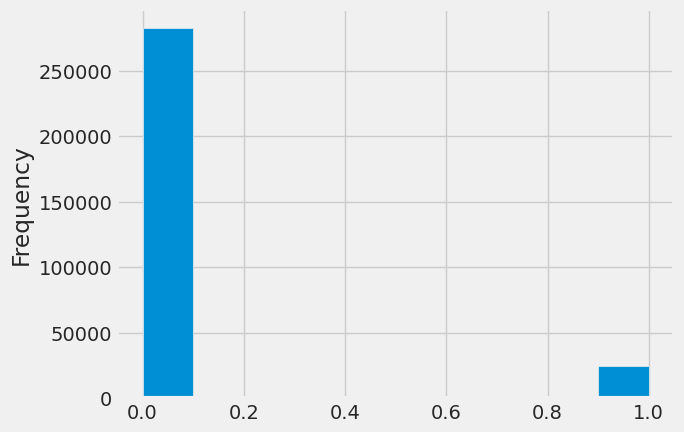

In [219]:
train_dat['TARGET'].astype(int).plot.hist();

In [220]:
# Total na
mis_val = train_dat.isnull().sum()
        
# Percentage
mis_val_percent = 100 * train_dat.isnull().sum() / len(train_dat)
        
# tbl_result
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [221]:
train_dat.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [222]:
#categorical
train_dat.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [223]:
#Encoding Categorical Variables
#Label Encoding and One-Hot Encoding

#encoder obj
le = LabelEncoder()
le_count = 0

for col in train_dat:
    if train_dat[col].dtype == 'object':
        if len(list(train_dat[col].unique())) <= 2:
            #Train training data
            le.fit(train_dat[col])
            #Transform
            train_dat[col] = le.transform(train_dat[col])
            test_dat[col] = le.transform(test_dat[col])
            
            #track label
            le_count += 1
            
print('%d kolom diberi label yang disandikan.' % le_count)

3 kolom diberi label yang disandikan.


In [224]:
#one-hot encoding
train_dat = pd.get_dummies(train_dat)
test_dat = pd.get_dummies(test_dat)

print('Bentuk Fitur Pelatihan: ', train_dat.shape)
print('Bentuk Fitur Percobaan: ', test_dat.shape)

Bentuk Fitur Pelatihan:  (307511, 243)
Bentuk Fitur Percobaan:  (48744, 239)


In [225]:
pd.set_option('display.max_rows', None)
train_dat.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,0.003941,0.030090,0.007466,0.005785,0.005284,0.214757,0.210773,0.017437,0.518446,0.007570
std,102790.175348,0.272419,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,0.062656,0.170835,0.086085,0.075840,0.072501,0.410654,0.407858,0.130892,0.499660,0.086679
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,456255.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Angka di kolom DAYS_BIRTH adalah negatif karena dicatat relatif terhadap aplikasi pinjaman saat ini. Untuk melihat statistik ini dalam beberapa tahun, kita dapat membaginya dengan -1 dan membaginya dengan jumlah hari dalam setahun:

In [226]:
(train_dat['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Tidak ada outlier untuk usia baik di high atau low end. bagaimana days_employed, kalau dilihat data desc() sebelumnya terlihat negatif juga

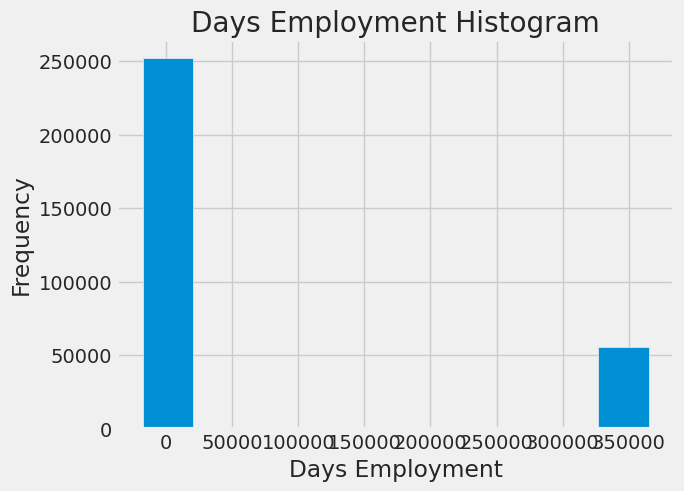

In [227]:
train_dat['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [228]:
#progressive check
anom = train_dat[train_dat['DAYS_EMPLOYED'] == 365243]
non_anom = train_dat[train_dat['DAYS_EMPLOYED'] != 365243]
print('Non-anomali default pada %0.2f%% dari pinjaman' % (100 * non_anom['TARGET'].mean()))
print('Anomali gagal bayar %0.2f%% dari pinjaman' % (100 * anom['TARGET'].mean()))
print('Terdapat %d hari anomali dari pekerjaan' % len(anom))

Non-anomali default pada 8.66% dari pinjaman
Anomali gagal bayar 5.40% dari pinjaman
Terdapat 55374 hari anomali dari pekerjaan


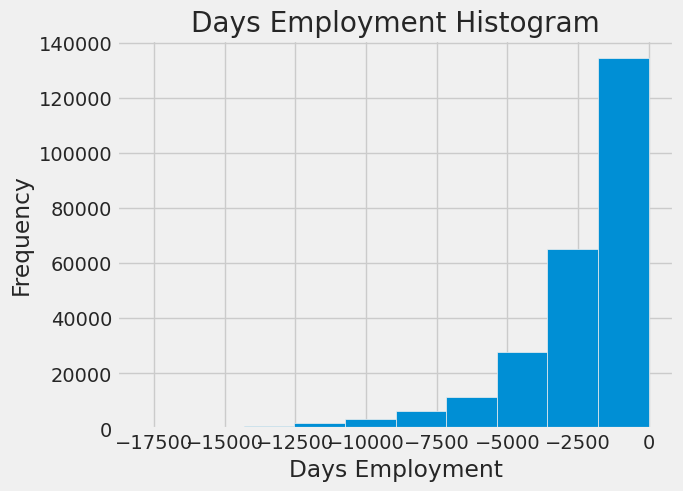

In [229]:
'''karena semua anomali memiliki nilai yang persis sama, 
maka mengisinya dengan nilai yang sama jika semua pinjaman ini memiliki kesamaan.
mengisi nilai anomali dengan bukan angka (np.nan) 
lalu membuat kolom boolean baru yang menunjukkan apakah nilainya anomali atau tidak.'''


train_dat['DAYS_EMPLOYED_ANOM'] = train_dat["DAYS_EMPLOYED"] == 365243
#replace
train_dat['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
train_dat['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');


In [230]:
train_dat.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,0,0,0,1,0,False
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,False


note:
apa pun yang kita lakukan pada data pelatihan juga harus kita lakukan pada data pengujian.

In [231]:
test_dat['DAYS_EMPLOYED_ANOM'] = test_dat["DAYS_EMPLOYED"] == 365243
test_dat["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('Terdapat %d anomali dalam data uji dar %d entri' % (test_dat["DAYS_EMPLOYED_ANOM"].sum(), len(test_dat)))

Terdapat 9274 anomali dalam data uji dar 48744 entri


Koefisien korelasi bukanlah metode terbaik untuk merepresentasikan "relevansi" suatu fitur, tetapi ini memberi kita gambaran tentang kemungkinan hubungan di dalam data. 
Beberapa interpretasi umum dari nilai absolut koefisien korelasi adalah: 
* .00-.19 “sangat lemah” 
* .20-.39 “lemah” 
* .40-.59 “sedang” 
* .60-.79 “kuat” 
* .80-1.0 "sangat kuat"

In [232]:
correlations = train_dat.corr()['TARGET'].sort_values()

print('Korelasi Paling Positif:\n', correlations.tail(15))
print('\nKorelasi Paling Negatif:\n', correlations.head(15))

Korelasi Paling Positif:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Korelasi Palin

Mari kita lihat beberapa korelasi yang lebih signifikan: DAYS_BIRTH adalah korelasi yang paling positif. (kecuali untuk TARGET karena korelasi variabel dengan dirinya sendiri selalu 1!) Melihat dokumentasi, DAYS_BIRTH adalah usia klien dalam hari pada saat pinjaman di hari negatif (untuk alasan apapun!). Korelasinya positif, tetapi nilai fitur ini sebenarnya negatif, yang berarti bahwa seiring bertambahnya usia klien, mereka cenderung gagal membayar pinjaman mereka (yaitu target == 0). Itu sedikit membingungkan, jadi kami akan mengambil nilai absolut dari fitur tersebut dan korelasinya akan menjadi negatif

In [233]:
train_dat.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,0,0,0,1,0,False
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,False


In [234]:
#Effect of Age pada Repayment
train_dat['DAYS_BIRTH'] = abs(train_dat['DAYS_BIRTH'])
train_dat['DAYS_BIRTH'].corr(train_dat['TARGET'])

-0.07823930830982694


Seiring bertambahnya usia nasabah, terdapat hubungan linier negatif dengan target yang berarti bahwa seiring bertambahnya usia nasabah, mereka cenderung lebih sering melunasi pinjamannya tepat waktu.

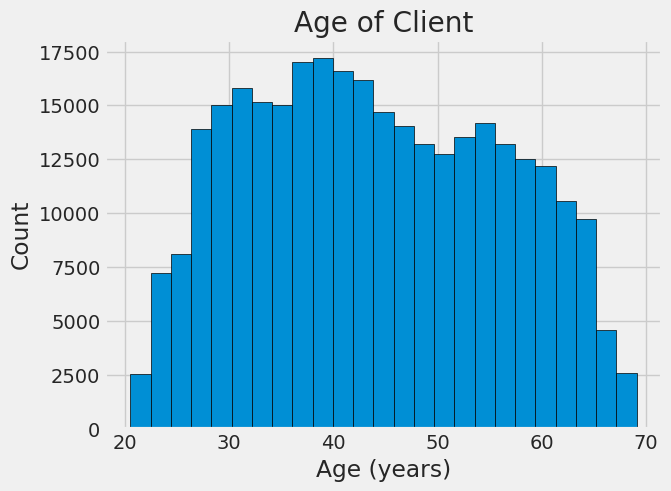

In [235]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(train_dat['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

Dengan sendirinya, distribusi usia tidak banyak memberi tahu kita selain tidak ada outlier karena semua usia masuk akal. Untuk memvisualisasikan efek usia pada target, selanjutnya kita akan membuat [plot perkiraan kepadatan kernel](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) yang diwarnai dengan nilai target.

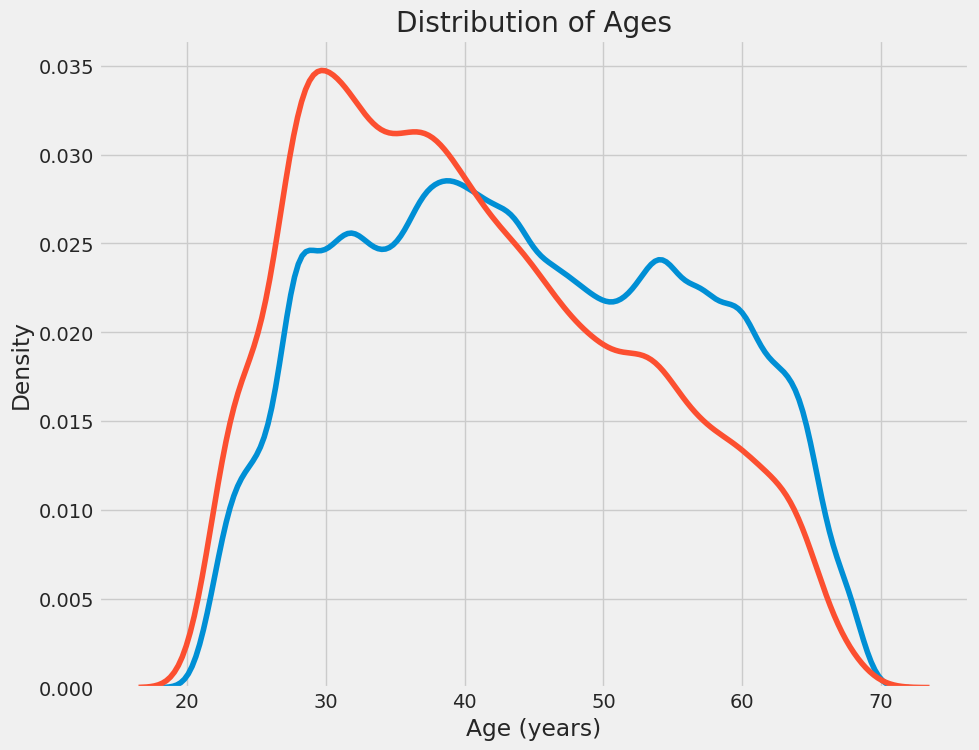

In [236]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_dat.loc[train_dat['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_dat.loc[train_dat['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

Kurva target == 1 condong ke ujung rentang yang lebih muda. Meskipun ini bukan korelasi yang signifikan (koefisien korelasi -0,07), variabel ini kemungkinan besar akan berguna dalam model pembelajaran mesin karena memengaruhi target. Mari kita lihat hubungan ini dengan cara lain: kegagalan rata-rata untuk membayar kembali pinjaman berdasarkan kelompok usia.

Untuk membuat grafik ini, pertama-tama kita `memotong` kategori usia ke dalam kotak masing-masing 5 tahun. Kemudian, untuk setiap kotak, kami menghitung nilai rata-rata dari target, yang menunjukkan rasio pinjaman yang tidak dibayar di setiap kategori umur.

In [237]:
train_dat.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,0,0,0,1,0,False
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,False


In [238]:
# Age information yang dibagi
age_data = train_dat[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [239]:
# Group and avarage
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


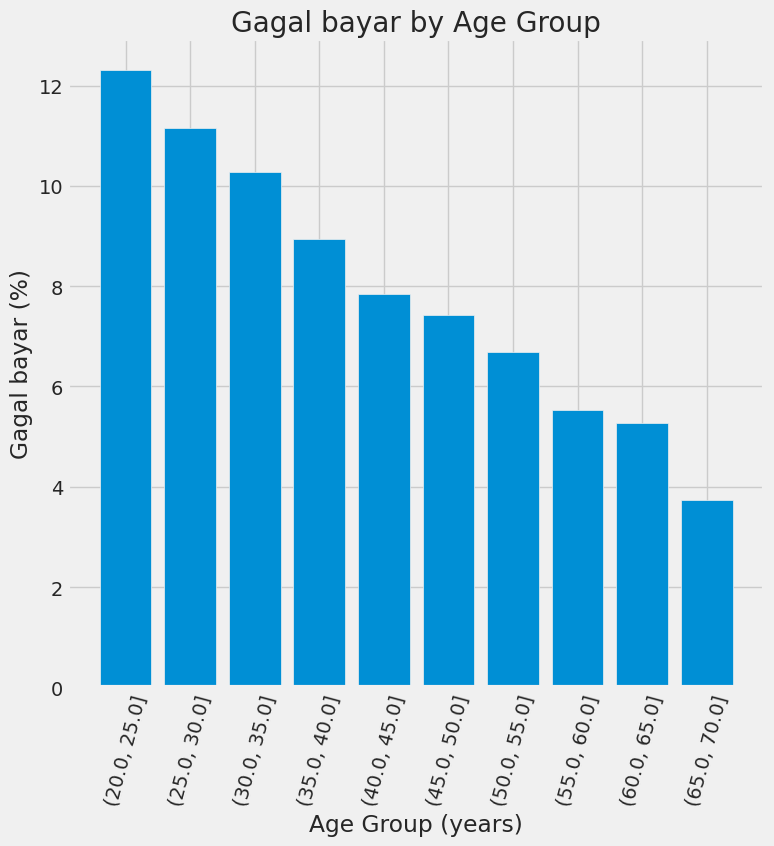

In [240]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Gagal bayar (%)')
plt.title('Gagal bayar by Age Group');

Ada tren yang jelas: pelamar yang lebih muda cenderung tidak membayar kembali pinjamannya! Tingkat kegagalan membayar di atas 10% untuk tiga kelompok umur termuda dan di bawah 5% untuk kelompok umur tertua.

Ini adalah informasi yang dapat langsung digunakan oleh bank: karena klien yang lebih muda cenderung tidak dapat melunasi pinjaman, mungkin mereka harus diberi lebih banyak panduan atau tip perencanaan keuangan. Ini tidak berarti bank harus mendiskriminasi nasabah yang lebih muda, tetapi akan bijaksana untuk mengambil tindakan pencegahan untuk membantu nasabah yang lebih muda membayar tepat waktu.

### Exterior Sources

3 variabel dengan korelasi negatif terkuat dengan target adalah `EXT_SOURCE_1`, `EXT_SOURCE_2`, dan `EXT_SOURCE_3`.
Menurut dokumentasi, fitur ini mewakili "skor yang dinormalisasi dari sumber data eksternal". Saya tidak yakin apa artinya ini sebenarnya, tetapi ini mungkin semacam peringkat kredit kumulatif yang dibuat menggunakan berbagai sumber data.

Mari kita lihat variabel-variabel ini.

Pertama, kita dapat menunjukkan korelasi fitur `EXT_SOURCE` dengan target dan satu sama lain.

In [241]:
train_dat.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,0,0,0,1,0,False
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,False


In [242]:
# EXT_SOURCE correlations
ext_data = train_dat[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


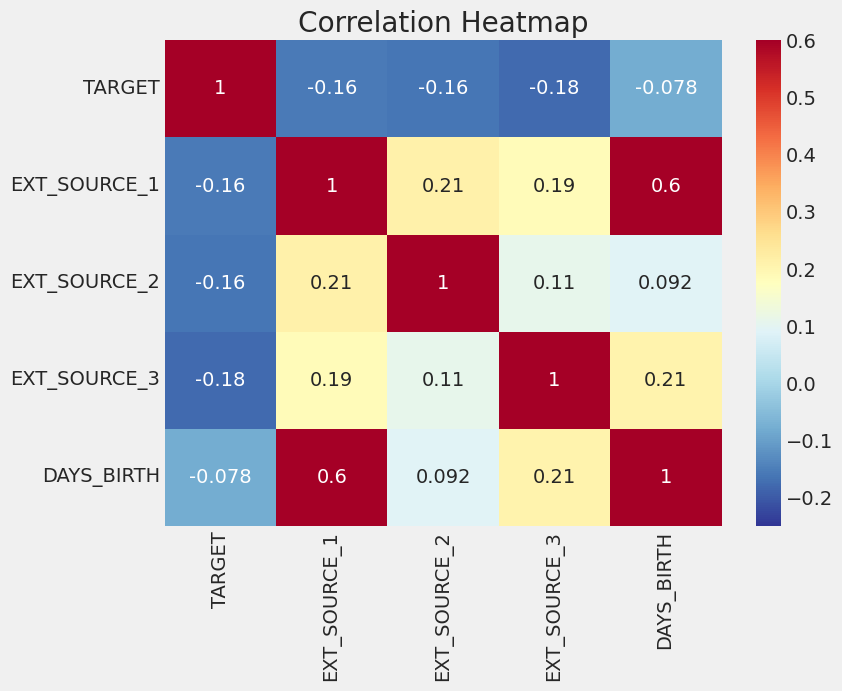

In [243]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Ketiga fitur `EXT_SOURCE` memiliki korelasi negatif dengan target, yang menunjukkan bahwa seiring dengan peningkatan nilai `EXT_SOURCE`, klien cenderung akan melunasi pinjaman. Kita juga dapat melihat bahwa `DAYS_BIRTH` berkorelasi positif dengan `EXT_SOURCE_1` yang menunjukkan bahwa mungkin salah satu faktor dalam skor ini adalah usia klien.

Selanjutnya kita bisa melihat sebaran masing-masing fitur tersebut diwarnai dengan nilai target. Ini akan membiarkan kita memvisualisasikan efek dari variabel ini pada target.

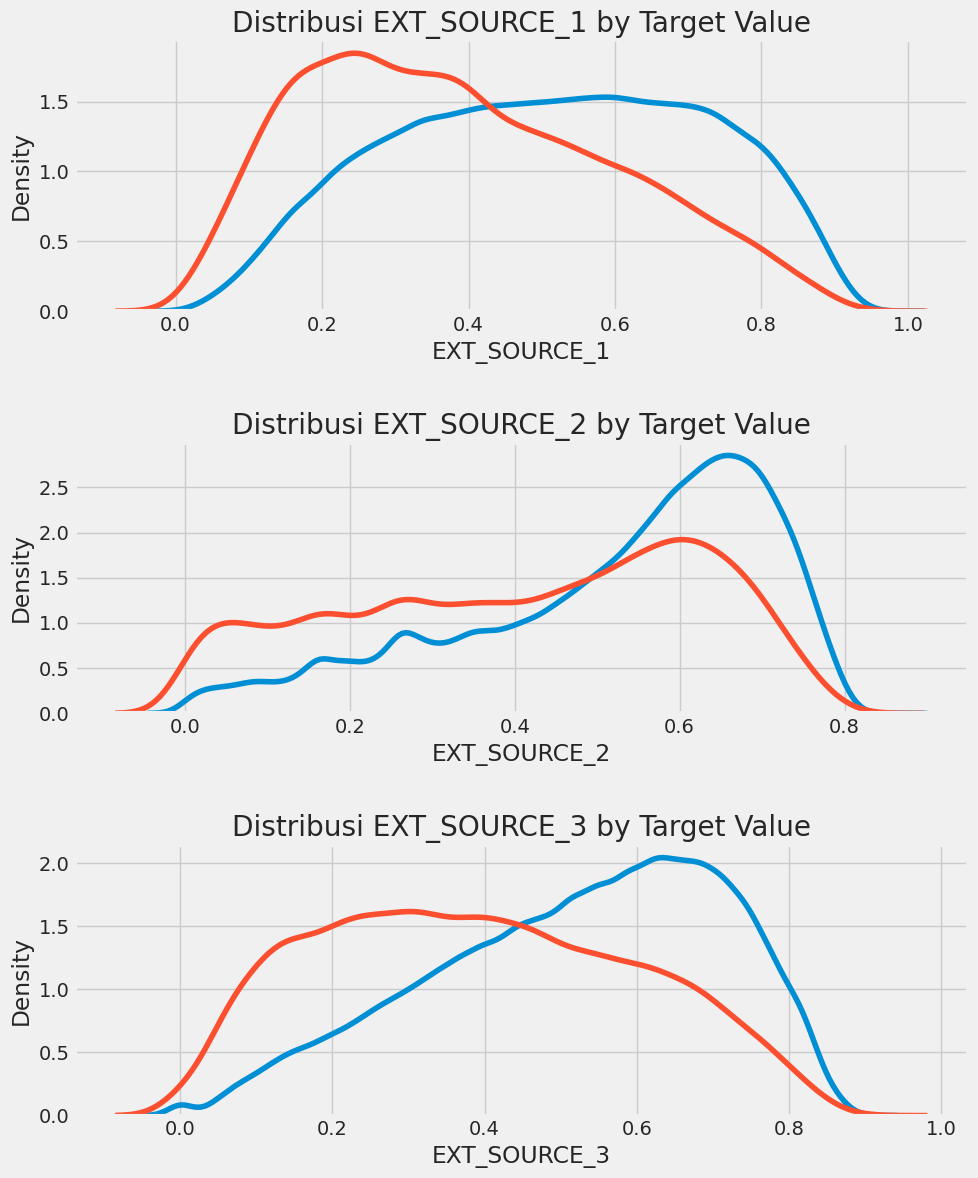

In [244]:
plt.figure(figsize = (10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(train_dat.loc[train_dat['TARGET'] == 0, source], label = 'target == 0')
    # plot loans yang not repaid
    sns.kdeplot(train_dat.loc[train_dat['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribusi %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)
    

`EXT_SOURCE_3` menampilkan perbedaan terbesar antara nilai target. Kami dapat dengan jelas melihat bahwa fitur ini memiliki beberapa hubungan dengan kemungkinan pemohon membayar kembali pinjaman. Hubungannya tidak terlalu kuat (sebenarnya semuanya [dianggap sangat lemah](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf), tetapi variabel ini akan tetap berguna untuk pembelajaran mesin model untuk memprediksi apakah atau tidak pemohon akan membayar kembali pinjaman tepat waktu.

## Cek Duplicate

In [245]:
columns_without_id = [col for col in train_dat.columns if col!='SK_ID_CURR']
#Checking for duplicates in the data.
train_dat[train_dat.duplicated(subset = columns_without_id, keep=False)]
print('The no of duplicates in the data:',train_dat[train_dat.duplicated(subset = columns_without_id, keep=False)]
      .shape[0])

The no of duplicates in the data: 0


In [246]:
#cek imbalance
train_dat['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

> Non-numerical feature engineering

In [247]:
#List of non-numerical variables
train_dat.select_dtypes(include=['O']).columns

Index([], dtype='object')

In [248]:
train_dat.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,0,0,0,1,0,False
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,False


semua kategorical sudah di encode

In [249]:
train_dat.columns.difference(test_dat.columns)


Index(['CODE_GENDER_XNA', 'NAME_FAMILY_STATUS_Unknown',
       'NAME_INCOME_TYPE_Maternity leave', 'TARGET'],
      dtype='object')

Untuk menghapus kolom di data pelatihan yang tidak ada di data pengujian, kita perlu menyelaraskan kerangka data. Pertama kita mengekstrak kolom target dari data pelatihan (karena ini tidak ada dalam data pengujian tetapi kita perlu menyimpan informasi ini). Saat kita melakukan penyelarasan, kita harus memastikan untuk menyetel sumbu = 1 untuk menyelaraskan kerangka data

In [250]:
#Aligning Training and Testing Data

train_labels = train_dat['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train_dat, test_dat = train_dat.align(test_dat, join = 'inner', axis = 1)

# Add the target back in
train_dat['TARGET'] = train_labels

print('Bentuk Fitur Pelatihan: ', train_dat.shape)
print('Bentuk Fitur Percobaan: ', test_dat.shape)

Bentuk Fitur Pelatihan:  (307511, 241)
Bentuk Fitur Percobaan:  (48744, 240)


Dataset pelatihan dan pengujian sekarang memiliki fitur yang sama yang diperlukan untuk pembelajaran mesin. Jumlah fitur telah berkembang secara signifikan karena penyandian satu-panas. Pada titik tertentu kita mungkin ingin mencoba pengurangan dimensi (menghapus fitur yang tidak relevan) untuk mengurangi ukuran kumpulan data.

> Menangani nilai yang hilang (menggunakan Iterative Imputer) sebelum deteksi outlier

Kita perlu menangani nilai yang hilang sebelum kita dapat melakukan deteksi outlier apa pun. Ada banyak cara untuk menangani nilai yang hilang. Kita dapat menggunakan fillna() dan mengganti nilai yang hilang dengan rata-rata data, median, atau nilai paling sering. Pendekatan yang akan kita gunakan di bawah ini adalah Iterative Imputer. Iterative imputer akan menganggap variabel yang hilang sebagai variabel dependen dan semua fitur lainnya akan menjadi variabel independen. Jadi akan ada regresi dan variabel independen akan digunakan untuk menentukan variabel dependen (yang merupakan fitur yang hilang).

In [251]:
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
import random

In [252]:
y=train_dat[['SK_ID_CURR','TARGET']]
X=train_dat.drop(columns=['TARGET'], axis=1)
X.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1,0,0,0,0,0,0,1,0,False
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,False


In [253]:
X_imputation = X.loc[:, (X.nunique() > 1000)]

In [254]:
X_imputation.columns

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'COMMONAREA_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG',
       'BASEMENTAREA_MODE', 'COMMONAREA_MODE', 'LANDAREA_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'COMMONAREA_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI',
       'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [255]:
imputer = IterativeImputer(BayesianRidge())
imputed_total = pd.DataFrame(imputer.fit_transform(X_imputation))
imputed_total.columns = X_imputation.columns

 ## Deteksi Outliers

In [256]:
columns_imp = []

for col in imputed_total.columns:
    columns_imp.append(col)
    
print(columns_imp)

['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'COMMONAREA_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'BASEMENTAREA_MODE', 'COMMONAREA_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'COMMONAREA_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE']


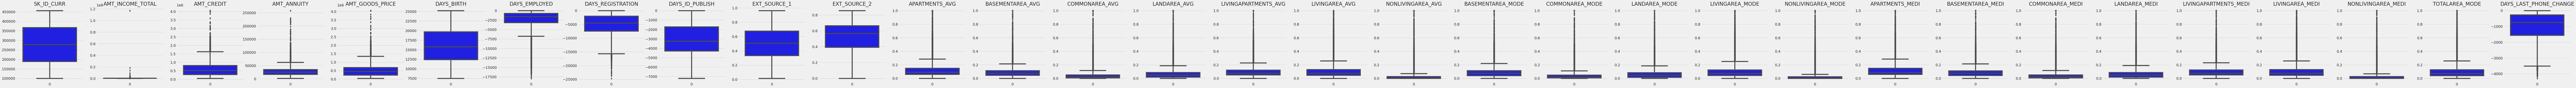

In [257]:
#box-plot
fig, axs = plt.subplots(ncols=len(columns_imp), figsize=(len(columns_imp)*5, 5))
for i in range(len(columns_imp)):
    sns.boxplot(train_dat[columns_imp[i]], color='blue', orient='v', ax=axs[i])
    axs[i].set_title(columns_imp[i])

plt.show()


In [258]:
new_data = imputed_total.copy()
new_data[columns_imp] = new_data[columns_imp].apply(pd.to_numeric, errors='coerce')

q1 = new_data[columns_imp].quantile(0.25)
q3 = new_data[columns_imp].quantile(0.75)

#IQR
iqr = q3 - q1

#ambang batas atas dan bawah outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#extreme outliers
extreme_lower_bound = q1 - 3 * iqr
extreme_upper_bound = q3 + 3 * iqr

#identifikasi outlier
outliers = new_data.loc[(new_data[columns_imp] < lower_bound).any(axis=1) | (new_data[columns_imp] > upper_bound).any(axis=1)]

xtr_outs = new_data.loc[(new_data[columns_imp] < extreme_lower_bound).any(axis=1) | (new_data[columns_imp] > extreme_upper_bound).any(axis=1)]



In [259]:
num_outliers = outliers.shape[0]
num_xtr_outliers = xtr_outs.shape[0]
print("No outliers:", num_outliers)
print("No extreme outliers:", num_outliers)
print(imputed_total.shape)

No outliers: 165774
No extreme outliers: 165774
(307511, 32)


Berdasarkan output yang Anda berikan, tampaknya tidak ada outlier atau outlier ekstrim pada data Anda. Jumlah baris pada dataset asli adalah 307.511 dan jumlah baris tanpa outlier atau outlier ekstrim adalah 165.774, yang sama dengan jumlah baris total.

> Isolation Forest: Hutan Isolasi akan menampilkan prediksi untuk setiap titik data dalam larik. 

Jika hasilnya -1, berarti titik data spesifik ini adalah outlier. Jika hasilnya 1, berarti titik data tersebut bukan outlier

Di sini kita akan menggunakan metode Hutan Isolasi karena dapat menangani nilai yang hilang dengan baik dan tidak memerlukan penskalaan input.


In [260]:
from sklearn.ensemble import IsolationForest
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.1) 
clf.fit(imputed_total)
if_scores = clf.decision_function(imputed_total)

pred = clf.predict(imputed_total)
imputed_total['anomaly']=pred
outliers=imputed_total.loc[imputed_total['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)

#Cari anomalies and normal points, nilai classified -1 adalah poin anomalous
print(imputed_total['anomaly'].value_counts())

 1    276760
-1     30751
Name: anomaly, dtype: int64


In [261]:
outlier_ID=list(outliers['SK_ID_CURR'])
X_new = X[~X.SK_ID_CURR.isin(outlier_ID)]
y_new = y[~y.SK_ID_CURR.isin(outlier_ID)]

In [262]:
print(X_new.shape)
print(X.shape)

(276760, 240)
(307511, 240)


### Anomali

Meskipun kami telah menghapus outlier menggunakan Isolation Forest, kami masih akan melihat datanya sekali untuk memeriksa anomali apa pun. Isolation Forest atau metode pendeteksian outlier apapun mengasumsikan bahwa outlier adalah suatu titik yang minoritas dan tidak menyerupai titik mayoritas lainnya. Namun terkadang beberapa titik penyimpangan jumlahnya terlalu banyak.

sebelumnya sudah ditangani, disini akan dilihat kembali

In [263]:
X_new['DAYS_EMPLOYED'].max()

0.0

In [264]:
X_new.describe()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
count,276760.000000,276760.000000,276760.000000,276760.000000,276760.000000,2.767600e+05,2.767600e+05,276750.000000,2.765050e+05,276760.000000,...,276760.000000,276760.000000,276760.000000,276760.000000,276760.00000,276760.000000,276760.000000,276760.000000,276760.000000,276760.000000
mean,278353.820292,0.093680,0.339099,0.692781,0.422424,1.647938e+05,5.864964e+05,26664.542715,5.264425e+05,0.020132,...,0.002934,0.027692,0.005933,0.003353,0.00443,0.182067,0.199285,0.013055,0.466726,0.006627
std,102439.692411,0.291384,0.473404,0.461342,0.727624,2.456313e+05,3.874074e+05,13953.626424,3.547584e+05,0.012863,...,0.054087,0.164089,0.076797,0.057809,0.06641,0.385901,0.399463,0.113509,0.498892,0.081134
min,100002.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189897.750000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.009657,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278354.000000,0.000000,0.000000,1.000000,0.000000,1.395000e+05,5.084955e+05,24594.750000,4.500000e+05,0.018850,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,366814.250000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.079840e+05,33835.500000,6.795000e+05,0.026392,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
max,456255.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,230161.500000,4.050000e+06,0.072508,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Data sekarang terlihat bagus dan bersih. mungkin bisa cek lagi

In [265]:
# checking lagi
total = X_new.isnull().sum().sort_values(ascending = False)
percent = (X_new.isnull().sum()/X_new.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

,Total,Percent
COMMONAREA_MODE,208526,75.345426
COMMONAREA_AVG,208526,75.345426
COMMONAREA_MEDI,208526,75.345426
NONLIVINGAPARTMENTS_MEDI,207234,74.878595
NONLIVINGAPARTMENTS_AVG,207234,74.878595
NONLIVINGAPARTMENTS_MODE,207234,74.878595
LIVINGAPARTMENTS_MEDI,204583,73.920726
LIVINGAPARTMENTS_AVG,204583,73.920726
LIVINGAPARTMENTS_MODE,204583,73.920726
FLOORSMIN_MODE,203081,73.378017


banyak yang hilang ternyata

In [266]:
columns_without_id = [col for col in X_new.columns if col!='SK_ID_CURR']
#Checking duplikat.
X_new[X_new.duplicated(subset = columns_without_id, keep=False)]
print('The no of duplicates in the data:',X_new[X_new.duplicated(subset = columns_without_id, keep=False)]
      .shape[0])

The no of duplicates in the data: 0


In [267]:
#imbalance
y_new['TARGET'].value_counts()

0    253747
1     23013
Name: TARGET, dtype: int64

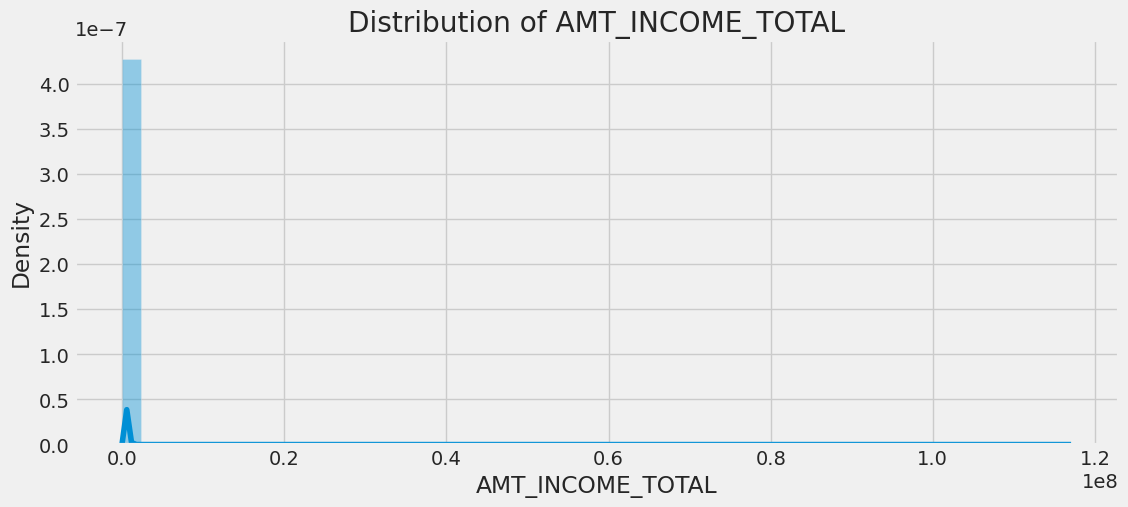

In [268]:
#Distribution of income
color = sns.color_palette()

plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(X_new["AMT_INCOME_TOTAL"])

In [ ]:
X_new["AMT_INCOME_TOTAL"].describe()

In [ ]:
application_train=pd.merge(X_new,y_new,on='SK_ID_CURR')


In [ ]:
(application_train[application_train['AMT_INCOME_TOTAL'] > 1000000]['TARGET'].value_counts())/len(application_train[application_train['AMT_INCOME_TOTAL'] > 1000000])*100

In [ ]:
from scipy.stats import boxcox
from matplotlib import pyplot


np.log(application_train['AMT_INCOME_TOTAL']).iplot(kind='histogram', bins=100,
                               xTitle = 'log(INCOME_TOTAL)',yTitle ='Count corresponding to Incomes',
                               title='Distribution of log(AMT_INCOME_TOTAL)')

Kita melihat bahwa variabel pendapatan berdistribusi normal ketika ditransformasi log.

In [ ]:
#Distribution of credit

color = sns.color_palette()

plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(application_train["AMT_CREDIT"])

In [ ]:
application_train["AMT_CREDIT"].describe()


In [ ]:
(application_train[application_train['AMT_CREDIT']>2000000]['TARGET'].value_counts())/len(application_train[application_train['AMT_CREDIT']>2000000])*100

In [ ]:
#Distribution of loan types
original_train_data = pd.read_csv('../input/home-credit-default-risk/application_train.csv')


contract_val = original_train_data['NAME_CONTRACT_TYPE'].value_counts()
contract_df = pd.DataFrame({'labels': contract_val.index,
                   'values': contract_val.values
                  })
contract_df.iplot(kind='pie',labels='labels',values='values', title='Types of Loan')

Lebih banyak orang tertarik untuk mengambil pinjaman tunai daripada pinjaman bergulir.

In [ ]:
#Distribution of NAME_INCOME_TYPE
original_train_data["NAME_INCOME_TYPE"].iplot(kind="histogram", bins=20, theme="white", title="Passenger's Income Types",
                                            xTitle='Name of Income Types', yTitle='Count')


In [ ]:
education_val = original_train_data['NAME_INCOME_TYPE'].value_counts()

education_val_y0 = []
education_val_y1 = []
for val in education_val.index:
    education_val_y1.append(np.sum(original_train_data['TARGET'][original_train_data['NAME_INCOME_TYPE']==val] == 1))
    education_val_y0.append(np.sum(original_train_data['TARGET'][original_train_data['NAME_INCOME_TYPE']==val] == 0))

data = [go.Bar(x = education_val.index, y = ((education_val_y1 / education_val.sum()) * 100), name='Default' ),
        go.Bar(x = education_val.index, y = ((education_val_y0 / education_val.sum()) * 100), name='No default' )]

layout = go.Layout(
    title = "Income of people affecting default on loans",
    xaxis=dict(
        title='Income of people',
       ),
    yaxis=dict(
        title='Count of people accompanying in %',
        )
)

fig = go.Figure(data = data, layout=layout) 
fig.layout.template = 'plotly_dark'
py.iplot(fig)

In [ ]:
#Distribution of NAME_TYPE_SUITE
#Siapa yang menemani orang tersebut saat mengambil pinjaman?

original_train_data["NAME_TYPE_SUITE"].iplot(kind="histogram", bins=20, theme="white", title="Accompanying Person",
                                            xTitle='People accompanying', yTitle='Count')

Kebanyakan orang tidak ditemani.


In [ ]:
#Distribution of NAME_EDUCATION_TYPE
education_val = original_train_data['NAME_EDUCATION_TYPE'].value_counts()

education_val_y0 = []
education_val_y1 = []
for val in education_val.index:
    education_val_y1.append(np.sum(original_train_data['TARGET'][original_train_data['NAME_EDUCATION_TYPE']==val] == 1))
    education_val_y0.append(np.sum(original_train_data['TARGET'][original_train_data['NAME_EDUCATION_TYPE']==val] == 0))

data = [go.Bar(x = education_val.index, y = ((education_val_y1 / education_val.sum()) * 100), name='Default' ),
        go.Bar(x = education_val.index, y = ((education_val_y0 / education_val.sum()) * 100), name='No default' )]

layout = go.Layout(
    title = "Education sources of Applicants in terms of loan is repayed or not  in %",
    xaxis=dict(
        title='Education of Applicants',
       ),
    yaxis=dict(
        title='Count of applicants in %',
        )
)

fig = go.Figure(data = data, layout=layout) 
fig.layout.template = 'plotly_dark'
py.iplot(fig)

Orang dengan gelar mampu membayar kembali sebagian besar.

In [ ]:
#Effect of marital status on ability to pay back loans
education_val = original_train_data['NAME_FAMILY_STATUS'].value_counts()

education_val_y0 = []
education_val_y1 = []
for val in education_val.index:
    education_val_y1.append(np.sum(original_train_data['TARGET'][original_train_data['NAME_FAMILY_STATUS']==val] == 1))
    education_val_y0.append(np.sum(original_train_data['TARGET'][original_train_data['NAME_FAMILY_STATUS']==val] == 0))

data = [go.Bar(x = education_val.index, y = ((education_val_y1 / education_val.sum()) * 100), name='Default' ),
        go.Bar(x = education_val.index, y = ((education_val_y0 / education_val.sum()) * 100), name='No default' )]

layout = go.Layout(
    title = "Family status of Applicant in terms of loan is repayed or not in %",
    xaxis=dict(
        title='Family status of Applicants',
       ),
    yaxis=dict(
        title='Count of applicants in %',
        )
)

fig = go.Figure(data = data, layout=layout) 
fig.layout.template = 'plotly_dark'
py.iplot(fig)

In [ ]:
#Distribution of NAME_HOUSING_TYPE
education_val = original_train_data['NAME_HOUSING_TYPE'].value_counts()

education_val_y0 = []
education_val_y1 = []
for val in education_val.index:
    education_val_y1.append(np.sum(original_train_data['TARGET'][original_train_data['NAME_HOUSING_TYPE']==val] == 1))
    education_val_y0.append(np.sum(original_train_data['TARGET'][original_train_data['NAME_HOUSING_TYPE']==val] == 0))

data = [go.Bar(x = education_val.index, y = ((education_val_y1 / education_val.sum()) * 100), name='Default' ),
        go.Bar(x = education_val.index, y = ((education_val_y0 / education_val.sum()) * 100), name='No default' )]

layout = go.Layout(
    title = "Housing Type of Applicant in terms of loan is repayed or not in %",
    xaxis=dict(
        title='Housing Type of Applicants',
       ),
    yaxis=dict(
        title='Count of applicants in %',
        )
)

fig = go.Figure(data = data, layout=layout) 
fig.layout.template = 'plotly_dark'
py.iplot(fig)

Orang-orang di apartemen kantor, apartemen co-op hampir tidak pernah default.

In [ ]:
#Distribution of AGE
(original_train_data["DAYS_BIRTH"]/-365).iplot(kind="histogram", bins=20, theme="white", title="Customer's Ages",
                                            xTitle='Age of customer', yTitle='Count')

In [ ]:
#Effect of OCCUPATION_TYPE on default 
parameter_val = original_train_data['OCCUPATION_TYPE'].value_counts()

parameter_val_y0 = []
parameter_val_y1 = []
for val in parameter_val.index:
    parameter_val_y1.append(np.sum(original_train_data['TARGET'][original_train_data['OCCUPATION_TYPE']==val] == 1))
    parameter_val_y0.append(np.sum(original_train_data['TARGET'][original_train_data['OCCUPATION_TYPE']==val] == 0))

data = [go.Bar(x = parameter_val.index, y = ((parameter_val_y1 / parameter_val.sum()) * 100), name='Default' ),
        go.Bar(x = parameter_val.index, y = ((parameter_val_y0 / parameter_val.sum()) * 100), name='No default' )]

layout = go.Layout(
    title = "Occupation type of people affecting default on loans",
    xaxis=dict(
        title='Occupation type of people',
       ),
    yaxis=dict(
        title='Count of people Occupation that type of housing in %',
        )
)

fig = go.Figure(data = data, layout=layout) 
fig.layout.template = 'plotly_dark'
py.iplot(fig)

Orang yang sangat terampil lebih cenderung membayar kembali dan orang yang berketerampilan rendah tidak begitu mungkin membayar kembali pinjaman

Combining other tables to extract their data 


Ada banyak tabel selain application_train. Karena keterbatasan memori dan ruang pada Kaggle, saya tidak dapat menjelaskannya di sini. Tapi seseorang dapat dengan mudah mencari deskripsi di halaman data kompetisi. Kita perlu mengekstrak informasi dari ini


In [ ]:
#Feature Engineering of Application data
#Flag to represent when credit > income
application_train_dummies['Credit_flag'] = application_train_dummies['AMT_INCOME_TOTAL'] > application_train_dummies['AMT_CREDIT']
application_train_dummies['Percent_Days_employed'] = application_train_dummies['DAYS_EMPLOYED']/application_train_dummies['DAYS_BIRTH']*100
application_train_dummies['Annuity_as_percent_income'] = application_train_dummies['AMT_ANNUITY']/ application_train_dummies['AMT_INCOME_TOTAL']*100
application_train_dummies['Credit_as_percent_income'] = application_train_dummies['AMT_CREDIT']/application_train_dummies['AMT_INCOME_TOTAL']*100

application_test_dummies['Credit_flag'] = application_test_dummies['AMT_INCOME_TOTAL'] > application_test_dummies['AMT_CREDIT']
application_test_dummies['Percent_Days_employed'] = application_test_dummies['DAYS_EMPLOYED']/application_test_dummies['DAYS_BIRTH']*100
application_test_dummies['Annuity_as_percent_income'] = application_test_dummies['AMT_ANNUITY']/ application_test_dummies['AMT_INCOME_TOTAL']*100
application_test_dummies['Credit_as_percent_income'] = application_test_dummies['AMT_CREDIT']/application_test_dummies['AMT_INCOME_TOTAL']*100


In [ ]:

10.2 Using Bureau Data
# Combining numerical features
grp = bureau.drop(['SK_ID_BUREAU'], axis = 1).groupby(by=['SK_ID_CURR']).mean().reset_index()
grp.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in grp.columns]
application_bureau = application_train_dummies.merge(grp, on='SK_ID_CURR', how='left')
application_bureau.update(application_bureau[grp.columns].fillna(0))

application_bureau_test = application_test_dummies.merge(grp, on='SK_ID_CURR', how='left')
application_bureau_test.update(application_bureau_test[grp.columns].fillna(0))
# Combining categorical features
bureau_categorical = pd.get_dummies(bureau.select_dtypes('object'))
bureau_categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
grp = bureau_categorical.groupby(by = ['SK_ID_CURR']).mean().reset_index()
grp.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in grp.columns]
application_bureau = application_bureau.merge(grp, on='SK_ID_CURR', how='left')
application_bureau.update(application_bureau[grp.columns].fillna(0))

application_bureau_test = application_bureau_test.merge(grp, on='SK_ID_CURR', how='left')
application_bureau_test.update(application_bureau_test[grp.columns].fillna(0))

In [ ]:
10.2.1. Feature Engineering of Bureau Data
# Number of past loans per customer
grp = bureau.groupby(by = ['SK_ID_CURR'])['SK_ID_BUREAU'].count().reset_index().rename(columns = {'SK_ID_BUREAU': 'BUREAU_LOAN_COUNT'})

application_bureau = application_bureau.merge(grp, on='SK_ID_CURR', how='left')
application_bureau['BUREAU_LOAN_COUNT'] = application_bureau['BUREAU_LOAN_COUNT'].fillna(0)

application_bureau_test = application_bureau_test.merge(grp, on='SK_ID_CURR', how='left')
application_bureau_test['BUREAU_LOAN_COUNT'] = application_bureau_test['BUREAU_LOAN_COUNT'].fillna(0)
# Number of types of past loans per customer 
grp = bureau[['SK_ID_CURR', 'CREDIT_TYPE']].groupby(by = ['SK_ID_CURR'])['CREDIT_TYPE'].nunique().reset_index().rename(columns={'CREDIT_TYPE': 'BUREAU_LOAN_TYPES'})

application_bureau = application_bureau.merge(grp, on='SK_ID_CURR', how='left')
application_bureau['BUREAU_LOAN_TYPES'] = application_bureau['BUREAU_LOAN_TYPES'].fillna(0)

application_bureau_test = application_bureau_test.merge(grp, on='SK_ID_CURR', how='left')
application_bureau_test['BUREAU_LOAN_TYPES'] = application_bureau_test['BUREAU_LOAN_TYPES'].fillna(0)
# Debt over credit ratio 
bureau['AMT_CREDIT_SUM'] = bureau['AMT_CREDIT_SUM'].fillna(0)
bureau['AMT_CREDIT_SUM_DEBT'] = bureau['AMT_CREDIT_SUM_DEBT'].fillna(0)

grp1 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM': 'TOTAL_CREDIT_SUM'})

grp2 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM_DEBT']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM_DEBT':'TOTAL_CREDIT_SUM_DEBT'})

grp1['DEBT_CREDIT_RATIO'] = grp2['TOTAL_CREDIT_SUM_DEBT']/grp1['TOTAL_CREDIT_SUM']

del grp1['TOTAL_CREDIT_SUM']

application_bureau = application_bureau.merge(grp1, on='SK_ID_CURR', how='left')
application_bureau['DEBT_CREDIT_RATIO'] = application_bureau['DEBT_CREDIT_RATIO'].fillna(0)
application_bureau['DEBT_CREDIT_RATIO'] = application_bureau.replace([np.inf, -np.inf], 0)
application_bureau['DEBT_CREDIT_RATIO'] = pd.to_numeric(application_bureau['DEBT_CREDIT_RATIO'], downcast='float')

application_bureau_test = application_bureau_test.merge(grp1, on='SK_ID_CURR', how='left')
application_bureau_test['DEBT_CREDIT_RATIO'] = application_bureau_test['DEBT_CREDIT_RATIO'].fillna(0)
application_bureau_test['DEBT_CREDIT_RATIO'] = application_bureau_test.replace([np.inf, -np.inf], 0)
application_bureau_test['DEBT_CREDIT_RATIO'] = pd.to_numeric(application_bureau_test['DEBT_CREDIT_RATIO'], downcast='float')


In [ ]:
(application_bureau[application_bureau['DEBT_CREDIT_RATIO'] > 0.5]['TARGET'].value_counts()/len(application_bureau[application_bureau['DEBT_CREDIT_RATIO'] > 0.5]))*100

In [ ]:
# Overdue over debt ratio
bureau['AMT_CREDIT_SUM_OVERDUE'] = bureau['AMT_CREDIT_SUM_OVERDUE'].fillna(0)
bureau['AMT_CREDIT_SUM_DEBT'] = bureau['AMT_CREDIT_SUM_DEBT'].fillna(0)

grp1 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM_OVERDUE']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM_OVERDUE'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM_OVERDUE': 'TOTAL_CUSTOMER_OVERDUE'})

grp2 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM_DEBT']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM_DEBT':'TOTAL_CUSTOMER_DEBT'})

grp1['OVERDUE_DEBT_RATIO'] = grp1['TOTAL_CUSTOMER_OVERDUE']/grp2['TOTAL_CUSTOMER_DEBT']

del grp1['TOTAL_CUSTOMER_OVERDUE']

application_bureau = application_bureau.merge(grp1, on='SK_ID_CURR', how='left')
application_bureau['OVERDUE_DEBT_RATIO'] = application_bureau['OVERDUE_DEBT_RATIO'].fillna(0)
application_bureau['OVERDUE_DEBT_RATIO'] = application_bureau.replace([np.inf, -np.inf], 0)
application_bureau['OVERDUE_DEBT_RATIO'] = pd.to_numeric(application_bureau['OVERDUE_DEBT_RATIO'], downcast='float')

application_bureau_test = application_bureau_test.merge(grp1, on='SK_ID_CURR', how='left')
application_bureau_test['OVERDUE_DEBT_RATIO'] = application_bureau_test['OVERDUE_DEBT_RATIO'].fillna(0)
application_bureau_test['OVERDUE_DEBT_RATIO'] = application_bureau_test.replace([np.inf, -np.inf], 0)
application_bureau_test['OVERDUE_DEBT_RATIO'] = pd.to_numeric(application_bureau_test['OVERDUE_DEBT_RATIO'], downcast='float')

In [ ]:
import gc

gc.collect()

In [ ]:
#10.3 Using Previous Application Data
def isOneToOne(df, col1, col2):
    first = df.drop_duplicates([col1, col2]).groupby(col1)[col2].count().max()
    second = df.drop_duplicates([col1, col2]).groupby(col2)[col1].count().max()
    return first + second == 2

isOneToOne(previous_application,'SK_ID_CURR','SK_ID_PREV')

In [ ]:
# Number of previous applications per customer
grp = previous_application[['SK_ID_CURR','SK_ID_PREV']].groupby(by=['SK_ID_CURR'])['SK_ID_PREV'].count().reset_index().rename(columns={'SK_ID_PREV':'PREV_APP_COUNT'})

# Take only the IDs which are present in application_bureau
application_bureau_prev = application_bureau.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev_test = application_bureau_test.merge(grp, on =['SK_ID_CURR'], how = 'left')

#Fill NA for previous application counts (lets say there was an application ID present in application_bureau but not present
# in grp, then that means that person never took loan previously, so count of previous loan for that person = 0)
application_bureau_prev['PREV_APP_COUNT'] = application_bureau_prev['PREV_APP_COUNT'].fillna(0)
application_bureau_prev_test['PREV_APP_COUNT'] = application_bureau_prev_test['PREV_APP_COUNT'].fillna(0)

In [ ]:
# Combining numerical features

#Take the mean of all the parameters (grouping by SK_ID_CURR)
grp = previous_application.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()

#Add prefix prev in front of all columns so that we know that these columns are from previous_application
prev_columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]

#Change the columns
grp.columns = prev_columns

application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))
application_bureau_prev_test = application_bureau_prev_test.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev_test.update(application_bureau_prev_test[grp.columns].fillna(0))

In [ ]:
# Combining categorical features
prev_categorical = pd.get_dummies(previous_application.select_dtypes('object'))
prev_categorical['SK_ID_CURR'] = previous_application['SK_ID_CURR']

grp = prev_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]

application_bureau_prev = application_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

application_bureau_prev_test = application_bureau_prev_test.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev_test.update(application_bureau_prev_test[grp.columns].fillna(0))

In [ ]:
gc.collect()


In [ ]:
#10.4. Using POS_CASH_balance data
# Combining numerical features
grp = pos_cash.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['POS_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]
grp.columns = prev_columns
application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

application_bureau_prev_test = application_bureau_prev_test.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev_test.update(application_bureau_prev_test[grp.columns].fillna(0))
# Combining categorical features
pos_cash_categorical = pd.get_dummies(pos_cash.select_dtypes('object'))
pos_cash_categorical['SK_ID_CURR'] = pos_cash['SK_ID_CURR']

grp = pos_cash_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['POS_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]
application_bureau_prev = application_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

application_bureau_prev_test = application_bureau_prev_test.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev_test.update(application_bureau_prev_test[grp.columns].fillna(0))
gc.collect()

In [ ]:
#10.5. Using installments_payments data
# Combining numerical features and there are no categorical features in this dataset
grp = insta_payments.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['INSTA_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]
grp.columns = prev_columns
application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))
application_bureau_prev_test = application_bureau_prev_test.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev_test.update(application_bureau_prev_test[grp.columns].fillna(0))
gc.collect()

In [ ]:
#10.6. Using Credit card balance data
credit_card=credit_card_balance
# Combining numerical features
grp = credit_card.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['CREDIT_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]
grp.columns = prev_columns
application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

application_bureau_prev_test = application_bureau_prev_test.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev_test.update(application_bureau_prev_test[grp.columns].fillna(0))
# Combining categorical features
credit_categorical = pd.get_dummies(credit_card.select_dtypes('object'))
credit_categorical['SK_ID_CURR'] = credit_card['SK_ID_CURR']

grp = credit_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['CREDIT_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]

application_bureau_prev = application_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

application_bureau_prev_test = application_bureau_prev_test.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev_test.update(application_bureau_prev_test[grp.columns].fillna(0))

In [ ]:
#Dividing data into train, valid and test
X=application_bureau_prev.drop(columns=['TARGET'])
y=application_bureau_prev['TARGET']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Feature Selection using Information Value and Weight of Evidence


There are many methods for feature selection. Some of them include feature importance using XGBoost and RandomForest. Other methods are forward or backward elimination and Boruta. Here we use one of the most common methods for feature selection, Information value and weight of evidence to determine the feature selection for credit risk analysis.

Code to calculate IV and WOE

max_bin = 20

force_bin = 3

In [ ]:
#function

def mono_bin(Y, X, n = max_bin):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)

    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()

    return(d3)

In [ ]:
def char_bin(Y, X):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)

    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)

    return(d3)

In [ ]:
def data_vars(df1, target):

    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]

    x = df1.dtypes.index
    count = -1

    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1

            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)

    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [ ]:
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
final_iv, IV = data_vars(X_train, y_train)
IV

In [ ]:
#i n case of Information value, predictions with information value < 0.02 are useless for predictions, 
#so we will only consider columns with IV > 0.02.

list_of_columns=IV[IV['IV'] > 0.02]['VAR_NAME'].to_list()
print(len(list_of_columns))

In [ ]:
#We find that only 63 columns are efficient in predicting the default by a customer. Hence we shall only consider those columns

X_train_selected_features=X_train[list_of_columns]
X_test_selected_features=X_test[list_of_columns]
X_train_selected_features['SK_ID_CURR']=X_train['SK_ID_CURR']
X_test_selected_features['SK_ID_CURR']=X_test['SK_ID_CURR']

application_bureau_prev_test_selected_features=application_bureau_prev_test[list_of_columns]
application_bureau_prev_test_selected_features['SK_ID_CURR']=application_bureau_prev_test['SK_ID_CURR']

Imputasi Data sebelum menerapkan algoritma pembelajaran mesin
Ada banyak cara untuk menangani nilai yang hilang.

 Kita dapat menggunakan fillna() dan mengganti nilai yang hilang dengan rata-rata data, median, atau nilai paling sering. Pendekatan yang akan kita gunakan di bawah ini adalah Iterative Imputer. Iterative imputer akan menganggap variabel yang hilang sebagai variabel dependen dan semua fitur lainnya akan menjadi variabel independen. Kemudian akan menerapkan regresi dan variabel independen akan digunakan untuk menentukan variabel dependen (yang merupakan fitur yang hilang).

In [ ]:
imputer = IterativeImputer(BayesianRidge())
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_selected_features))
X_train_imputed.columns = X_train_selected_features.columns

imputer = IterativeImputer(BayesianRidge())
application_bureau_prev_test_selected_features_subset1=application_bureau_prev_test_selected_features.iloc[:, np.r_[62,0:30]]
app_bur_prev_test_imputed_subset1 = pd.DataFrame(imputer.fit_transform(application_bureau_prev_test_selected_features_subset1))
app_bur_prev_test_imputed_subset1.columns = application_bureau_prev_test_selected_features_subset1.columns

application_bureau_prev_test_selected_features_subset2=application_bureau_prev_test_selected_features.iloc[:, np.r_[31:63]]
app_bur_prev_test_imputed_subset2 = pd.DataFrame(imputer.fit_transform(application_bureau_prev_test_selected_features_subset2))
app_bur_prev_test_imputed_subset2.columns = application_bureau_prev_test_selected_features_subset2.columns

app_bur_prev_test_imputed=pd.merge(app_bur_prev_test_imputed_subset1, app_bur_prev_test_imputed_subset2, on= 'SK_ID_CURR')

imputer = IterativeImputer(BayesianRidge())
X_test_imputed = pd.DataFrame(imputer.fit_transform(X_test_selected_features))
X_test_imputed.columns = X_test_selected_features.columns

print(X_test_imputed.shape)
print(X_train_imputed.shape)
print(app_bur_prev_test_imputed.shape)

Sejajarkan kerangka data pelatihan dan pengujian, pertahankan hanya kolom yang ada di kedua kerangka data Kita lihat di atas bahwa jumlah kolom dalam test dan training set tidak sama.

In [ ]:
X_train_imputed, app_bur_prev_test_imputed  = app_bur_prev_test_imputed.align(X_train_imputed, join = 'inner', axis = 1)
X_train_imputed,X_test_imputed= X_train_imputed.align(X_test_imputed, join = 'inner', axis = 1)

Applying Machine Learning Algorithms (using cross validation) 


Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state = 0, class_weight='balanced')
lr_clf.fit(X_train_imputed, y_train)
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
y_train_pred_lr=cross_val_predict(lr_clf, X_train_imputed, y_train, cv=3)
print('Accuracy on Training set:',cross_val_score(lr_clf, X_train_imputed,y_train, cv=3, scoring='accuracy'))
print('Accuracy on Test set:',cross_val_score(lr_clf, X_test_imputed,y_test, cv=3, scoring='accuracy'))

In [ ]:
Applying XGBoost

#Scale_pos_weight if set to sum(negative instances)/ sum(negative instances) will take care of imbalanced data in the dataset
scale_pos_weight_value=y_train.value_counts().values.tolist()[0]/y_train.value_counts().values.tolist()[1]
from xgboost import XGBClassifier
XGB_clf = XGBClassifier(scale_pos_weight=scale_pos_weight_value)
XGB_clf.fit(X_train_imputed, y_train)
print('Accuracy on Training set:',cross_val_score(XGB_clf, X_train_imputed, y_train, cv=3, scoring='accuracy'))
print('Accuracy on Test set:',cross_val_score(XGB_clf, X_test_imputed, y_test, cv=3, scoring='accuracy'))

In [ ]:
#Applying CATBOOST

cols_numeric = X_train_imputed.select_dtypes([np.number]).columns cols_categorical=X_train_imputed.columns.difference(cols_numeric)

In [ ]:
#We find that there are no categorical columns
from catboost import CatBoostClassifier 
CatBoost_clf=CatBoostClassifier(scale_pos_weight=scale_pos_weight_value)
CatBoost_clf=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
CatBoost_clf.fit(X_train_imputed, y_train) 
print('Accuracy on Training set:',cross_val_score(CatBoost_clf, X_train_imputed, y_train, cv=3, scoring='accuracy')) 
print('Accuracy on Test set:',cross_val_score(CatBoost_clf, X_test_imputed, y_test, cv=3, scoring='accuracy'))

In [ ]:
#Applying LightGBM

import lightgbm as lgb
LightGBM_clf=lgb.LGBMClassifier(scale_pos_weight=scale_pos_weight_value)
LightGBM_clf.fit(X_train_imputed, y_train)
print('Accuracy on Training set:',cross_val_score(LightGBM_clf, X_train_imputed, y_train, cv=3, scoring='accuracy'))
print('Accuracy on Test set:',cross_val_score(LightGBM_clf, X_test_imputed, y_test, cv=3, scoring='accuracy'))

In [ ]:
#Applying RandomForest

#class_weight = 'balanced' ensures that RandomForest works well on imbalanced datasets.
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, random_state = 0, n_jobs=-1, class_weight="balanced")
rf_clf.fit(X_train_imputed, y_train)
print('Accuracy on Training set:',cross_val_score(rf_clf, X_train_imputed, y_train, cv=3, scoring='accuracy'))
print('Accuracy on Test set:',cross_val_score(rf_clf, X_test_imputed, y_test, cv=3, scoring='accuracy'))

Evaluating machine learning algorithms accuracy on training and testing sets

This perfromance is without tuning any hyperparameters and without any optimisation